#CS345: Practical ML and Data Mining  Assignment#4

In [33]:
# เชื่อมต่อ drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# import ไฟล์ที่ต้องใช้มาใส่ตัวแปร X_train, y_train และ X_test, y_test
import pandas as pd

X_train = pd.read_csv('/content/drive/MyDrive/data/data_train.txt', delimiter=r'\s+', header=None)
y_train = pd.read_csv('/content/drive/MyDrive/data/data_train_labels.txt', header=None).squeeze()
X_test = pd.read_csv('/content/drive/MyDrive/data/data_test.txt', delimiter=r'\s+', header=None)
y_test = pd.read_csv('/content/drive/MyDrive/data/data_test_labels.txt', header=None).squeeze()

In [35]:
# ตรวจสอบขนาดตัวแปล
print("data size :", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

data size : (7352, 561) (7352,) (2947, 561) (2947,)




---


**1. รวมข้อมูลจาก training กับ test เข้าด้วยกัน เป็น X และ y**

In [36]:
import numpy as np

# รวม X_train กับ X_test เป็น X และ y_train กับ y_test เป็น y
X = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
y = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

# แล้วแสดงค่าของคลาสใน y ว่าเป็น 1, 2, 3, 4, 5, 6
y_unique = y.unique()
print("Unique classes in y :", y_unique)

Unique classes in y : [5 4 6 1 3 2]




---


**2. ปรับ Scale ของข้อมูลใน X ด้วย StandardScaler**

In [37]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler

# ปรับ Scale ข้อมูลใน X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



---


**3. ใช้อัลกอริทึม PCA ลดขนาด dimensions โดยเหลือจำนวน components เท่าที่จำเป็น เพื่อให้ได้ค่า
variance ที่จำเป็นในการอธิบายข้อมูลที่ปรับ scale แล้ว
อย่างน้อย 90% ด้วยการใช้พารามิเตอร์ n_components และ
ให้ใส่ค่า random_state = 17**

In [41]:
# import PCA algorithm
from sklearn.decomposition import PCA

# ลดขนาด dimensions โดย n_components เป็น 90% และ random_state = 17
pca = PCA(n_components=0.90 ,random_state=17)
X_pca = pca.fit_transform(X_scaled)



---


**4. พิมพ์ค่าจำนวน components ที่ต้องใช้เพื่อให้ได้ค่า variance ที่สามารถอธิบายข้อมูลที่ปรับ scale แล้วได้ 90%**

In [42]:
print("Number of components to retain 90% variance :", pca.n_components_)

Number of components to retain 90% variance : 65




---


**5. แสดง % ของค่า variance ที่ first principal component สามารถอธิบายได้**

In [44]:
first_component_variance = pca.explained_variance_ratio_[0] * 100
print(f"Explainable first principal component : {first_component_variance:.2f}%")

Explainable first principal component : 50.74%




---


**6. Visualize ข้อมูลที่ถูก transform ใหม่ด้วยสอง components แรก**

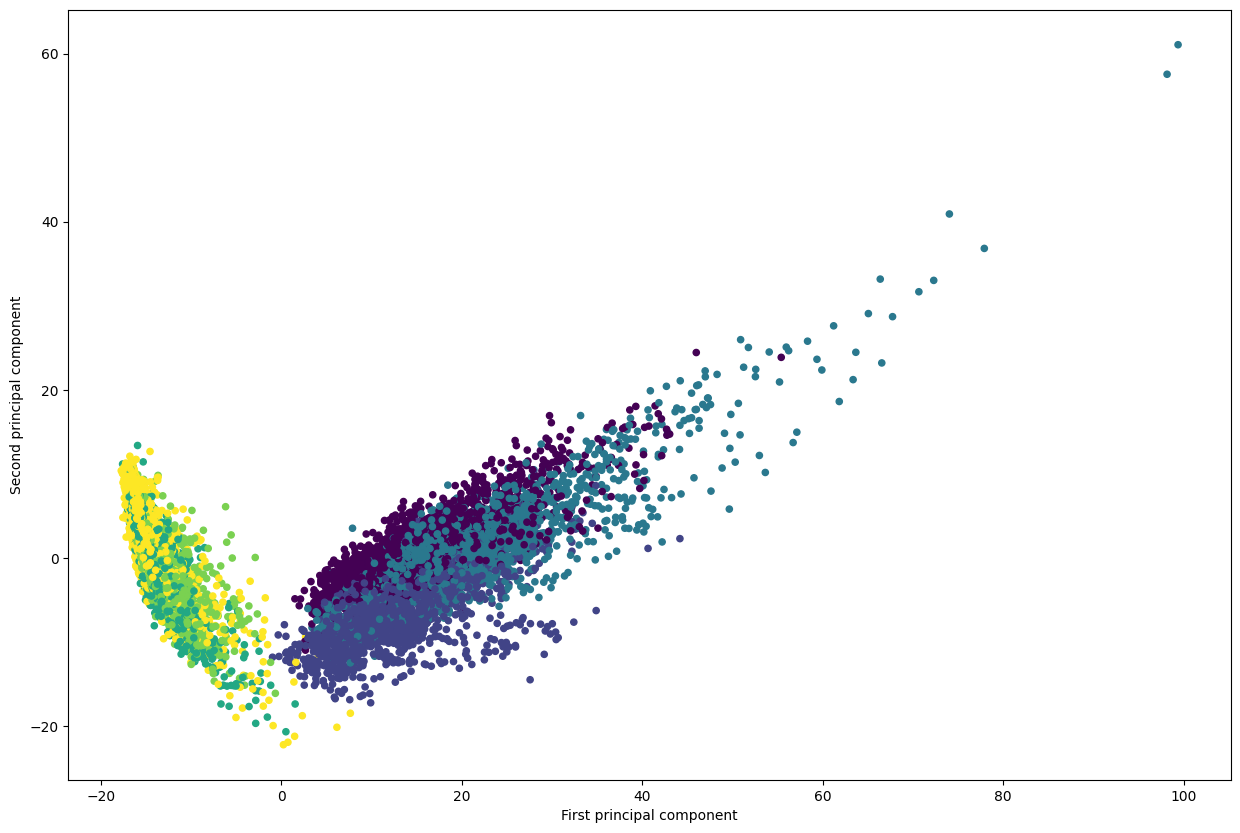

In [45]:
import matplotlib.pyplot as plt

# สร้าง figure ขนาด 15x10
plt.figure(figsize=(15,10))

# แสดง scatter plot ของข้อมูลที่ลดมิติโดยใช้ component 0 กับ 1 จาก PCA
plt.scatter(X_pca[:,0], X_pca[:,1] , c=y, s=20, cmap='viridis');
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()



---


**7. ใช้ Kmeans ทำ clustering โดยใช้ข้อมูลที่ลดขนาด dimensions ด้วย PCA แล้ว**

In [47]:
# import Kmeans
from sklearn.cluster import KMeans

# สร้างโมเดล KMeans ด้วยจำนวนคลัสเตอร์ตามจำนวนคลาส และใช้ parameter ตามที่กำหนด
n_classes = len(y.unique())
kmeans = KMeans(n_clusters=n_classes, n_init=100, random_state=17)

# ฝึกโมเดล KMeans ด้วยข้อมูลที่ผ่านการลดมิติด้วย PCA
kmeans.fit(X_pca)

KMeans(n_clusters=6, n_init=100, random_state=17)



---


**8. Visualize ข้อมูลสอง components แรก แสดงสีของข้อมูลตามคลัสเตอร์ที่ถูกแบ่ง คลัสเตอร์ละหนึ่งส**

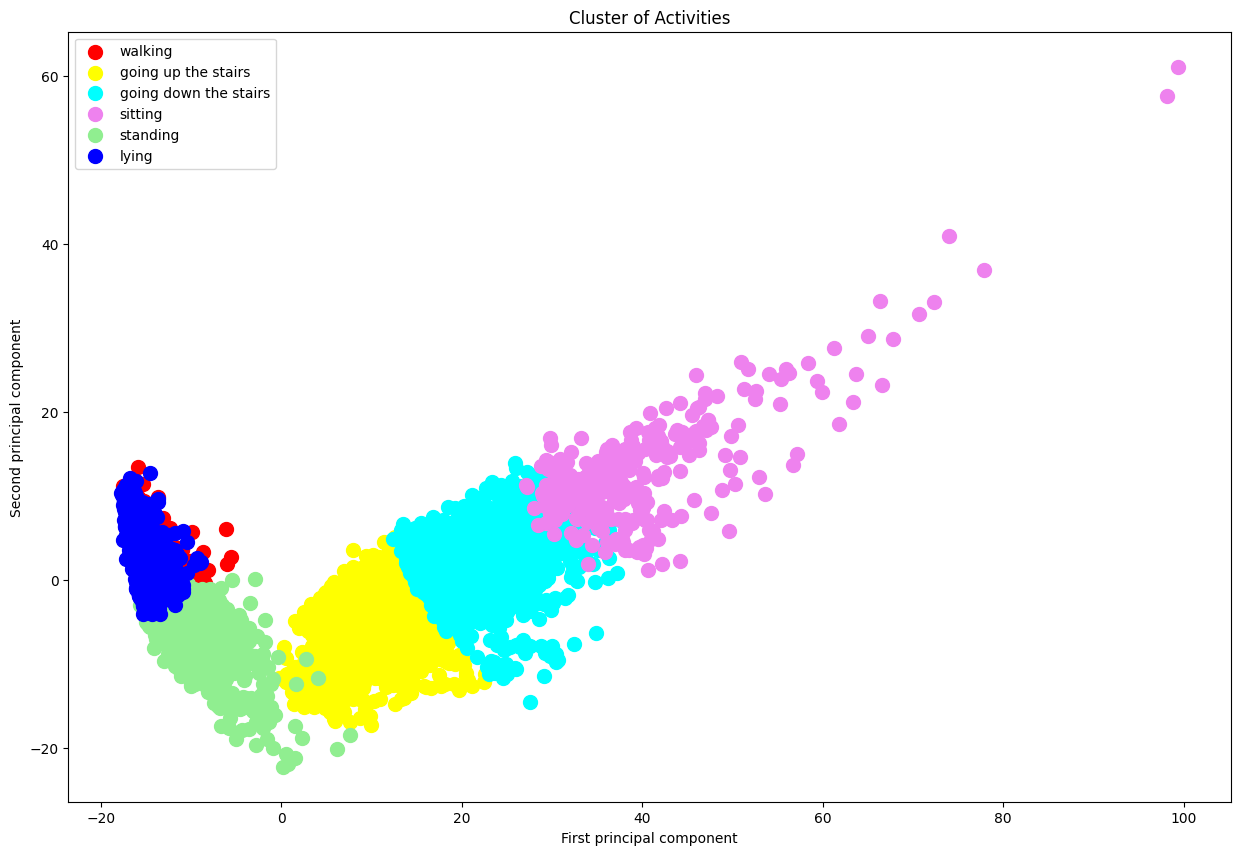

In [48]:
# ดึง labels ของคลัสเตอร์ที่ได้จาก KMeans
cluster_labels = kmeans.labels_

# สร้าง figure ขนาด 15x10
plt.figure(figsize=(15, 10))

# แสดง scatter plot ของข้อมูลที่ลดมิติโดยใช้สอง components แรกจาก PCA
# ใส่สีข้อมูลตามคลัสเตอร์ที่จัดกลุ่ม
plt.scatter(X_pca[cluster_labels == 0, 0], X_pca[cluster_labels == 0, 1], s = 100, c = 'red', label = 'walking')
plt.scatter(X_pca[cluster_labels == 1, 0], X_pca[cluster_labels == 1, 1], s = 100, c = 'yellow', label = 'going up the stairs')
plt.scatter(X_pca[cluster_labels == 2, 0], X_pca[cluster_labels == 2, 1], s = 100, c = 'aqua', label = 'going down the stairs')
plt.scatter(X_pca[cluster_labels == 3, 0], X_pca[cluster_labels == 3, 1], s = 100, c = 'violet', label = 'sitting')
plt.scatter(X_pca[cluster_labels == 4, 0], X_pca[cluster_labels == 4, 1], s = 100, c = 'lightgreen', label = 'standing')
plt.scatter(X_pca[cluster_labels == 5, 0], X_pca[cluster_labels == 5, 1], s = 100, c = 'blue', label = 'lying')

plt.title('Cluster of Activities')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.legend()

# แสดงกราฟ
plt.show()

In [49]:
# สร้างตาราง crosstab แสดงจำนวนแต่ละคลาสใน y ที่จัดอยู่ในแต่ละคลัสเตอร์จาก KMeans
tab = pd.crosstab(y, cluster_labels, margins=True)

# เปลี่ยนชื่อ index ของตารางให้แสดงชื่อกิจกรรมแทนตัวเลข
tab.index = ['walking', 'going up the stairs', 'going down the stairs', 'sitting', 'standing', 'lying', 'all']

# เปลี่ยนชื่อ columns ของตารางให้แสดงชื่อคลัสเตอร์และเพิ่ม column 'all' สำหรับผลรวม
tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['all']

# แสดงตาราง
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,all
walking,0,903,741,78,0,0,1722
going up the stairs,0,1241,296,5,2,0,1544
going down the stairs,0,320,890,196,0,0,1406
sitting,1235,1,0,0,450,91,1777
standing,1344,0,0,0,562,0,1906
lying,52,5,0,0,329,1558,1944
all,2631,2470,1927,279,1343,1649,10299


In [50]:
pd.Series(tab.iloc[:-1,:-1].max(axis=1).values / # หาค่าสูงสุดในแต่ละแถว ยกเว้นแถว 'all' และนำมาแบ่งด้วยผลรวมของแถวนั้น
tab.iloc[:-1,-1].values, # นำจำนวนตัวอย่างทั้งหมดของแต่ละกิจกรรมจากคอลัมน์ 'all' มาใช้ในการหาร
index=tab.index[:-1]) # กำหนด index เป็นชื่อกิจกรรม ไม่รวมแถว 'all'

,0
walking,0.524390
going up the stairs,0.803756
going down the stairs,0.633001
sitting,0.694992
standing,0.705142
lying,0.801440




---


**9. ใช้ elbow method หาจำนวนคลัสเตอร์ที่เหมาะสม แสดงกราฟของ elbow method**


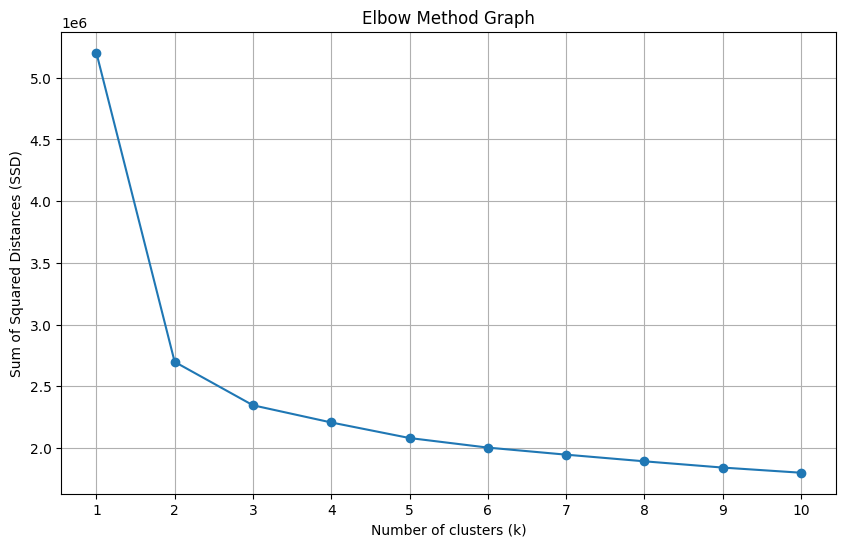

In [53]:
# ใช้ค่า k หลายๆ ค่า และบันทึกค่า Sum of Squared Distances (SSD)
ssd = []

# ทดสอบค่า k ตั้งแต่ 1 ถึง 10
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=17)
    kmeans.fit(X_pca)
    ssd.append(kmeans.inertia_)

# แสดงกราฟ Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_values, ssd, marker='o', linestyle='-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method Graph')
plt.xticks(k_values)
plt.grid()
plt.show()



---


**10. ข้อย่อย**

10.1 รัน Kmeans ใหม่ด้วยจำนวนคลัสเตอร์ที่ได้จาก Elbow method ใช้พารามิเตอร์ชุดเดิม แต่ค่า
n_clusters เป็นจำนวนคลัสเตอร์ที่ได้จากข้อ 9

In [54]:
# เลือกใช้ n_clusters เป็น 2

# สร้างโมเดล Kmeans ใหม่โดยกำหนดจำนวนคลัสเตอร์เป็น 2 ตามที่เลือกจาก Elbow Method
kmeans_optimal = KMeans(n_clusters=2, n_init=100, random_state=17)

# ฝึกโมเดล Kmeans ด้วยข้อมูลที่ลดมิติแล้ว
kmeans_optimal.fit(X_pca)

KMeans(n_clusters=2, n_init=100, random_state=17)

10.2 Plot กราฟการกระจายตัวของข้อมูลที่ได้ พร้อม cluster center

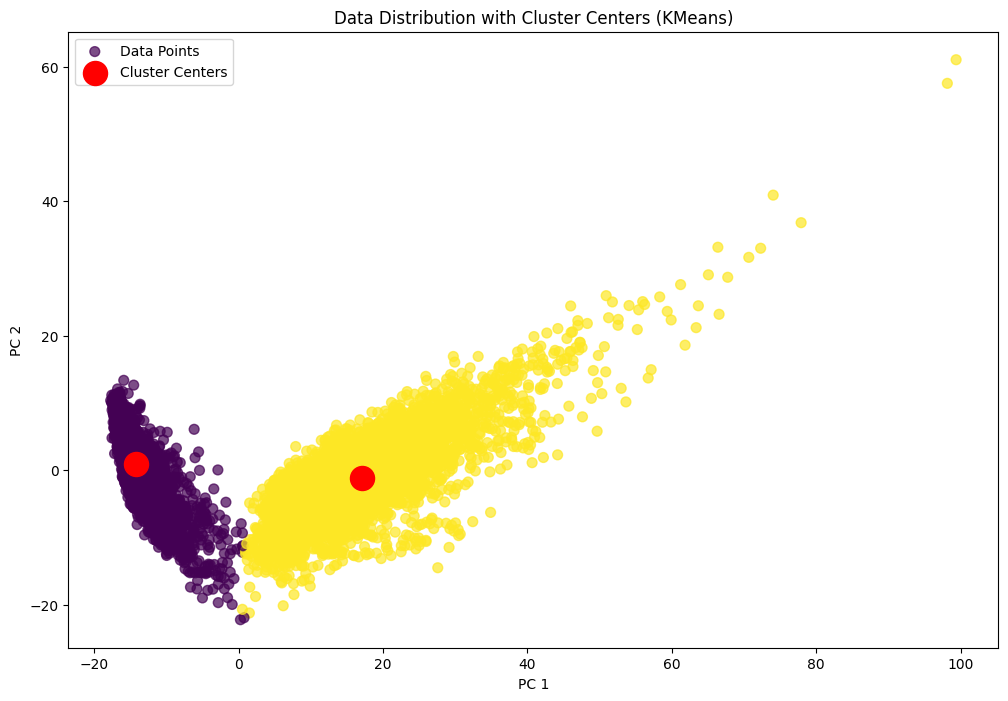

In [31]:
# สร้าง figure ขนาด 12x8
plt.figure(figsize=(12, 8))

# แสดง scatter plot ของข้อมูลที่ลดมิติแล้วด้วย PCA โดยใช้ 2 components แรก
# ใช้ c=kmeans_optimal.labels_ ลงสีจุดตามคลัสเตอร์ที่จัดกลุ่มโดย KMeans
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_optimal.labels_, cmap='viridis', s=50, alpha=0.7, label='Data Points')


# แสดง cluster center จุดแดง
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1],
            c='red', s=300, marker='o', label='Cluster Centers')

# กำหนดชื่อส่วนต่างๆ
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Data Distribution with Cluster Centers (KMeans)')

# แสดง legend
plt.legend()
# แสดงกราฟ
plt.show()

10.3 สรุปลักษณะเด่นของคลัสเตอร์ที่ได้


**ตอบ** เราจะได้ Cluster ทั้งหมด 2 Cluster โดย


**Cluster 1 สีม่วง :**

ข้อมูลมีความกระจุกตัวที่สูง ตัว Cluster center อยู่ใกล้จุดข้อมูลจำนวนมากบ่งบอกถึงความหนาแน่นของข้อมูลรอบๆ จุดศูนย์กลาง
และ Cluster 1 แสดงถึงกิจกรรมที่มีการเคลื่อนไหวน้อย เช่น sitting หรือ standing

**Cluster 2 สีเหลือง :**

ข้อมูลมีการกระจายตัวสูงขึ้น และห่างจาก Cluster 1 ค่อนข้างชัดเจน Cluster center ตั้งอยู่บริเวณที่มีการกระจายตัวกว้างกว่า แสดงให้เห็นถึงการครอบคลุมกิจกรรมที่หลากหลาย และ Cluster 2 แสดงถึงกิจกรรมที่มีการเคลื่อนไหวที่แตกต่างกันมาก เช่น walking หรือการเคลื่อนไหวที่เฉพาะเจาะจงมากกว่า เช่น going up the stairs หรือ going down the stairs
